# Lead Scoring Case Study

### Goals of the Lead Scoring Case Study


1. Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads.

2. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

3. There are some more problems presented by the company which model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well.

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd, numpy as np

In [2]:
#import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

#supress warnings
import warnings
warnings.filterwarnings("ignore")

# Sklearn libraries

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix,classification_report



#statmodel libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
# Importing all data
lead_score = pd.read_csv("Leads.csv")
lead_score.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
#shpae of data 
lead_score.shape

(9240, 37)

## Understanding the Data

In [6]:
#describe the data 
lead_score.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
#checking type of columns 
lead_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [8]:
lead_score['Converted'].value_counts(normalize=True)

0    0.61461
1    0.38539
Name: Converted, dtype: float64

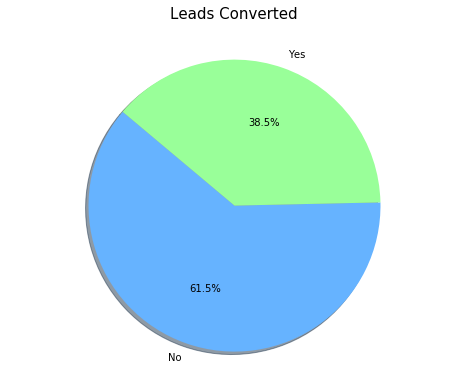

In [9]:
Converted_counts = lead_score['Converted'].value_counts()
Converted_percentages = (Converted_counts / len(lead_score)) * 100
colors = ['#66b3ff', '#99ff99']
labels = Converted_percentages.index.map({1: 'Yes', 0: 'No'})
plt.figure(figsize=(8, 6))
plt.pie(Converted_percentages, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=140, colors=colors)
plt.title("Leads Converted\n", fontsize=15)
plt.axis('equal')
plt.show()

We are dealing with imbalanced dataset, this should be considered during model evaluation

In [10]:
columns= list(lead_score.columns)
#columns

In [11]:
colums_newname= map(lambda x: x.replace(" ", ""), columns)

In [12]:
colums_newname=list(colums_newname)
lead_score.columns = colums_newname

In [13]:
lead_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   ProspectID                             9240 non-null   object 
 1   LeadNumber                             9240 non-null   int64  
 2   LeadOrigin                             9240 non-null   object 
 3   LeadSource                             9204 non-null   object 
 4   DoNotEmail                             9240 non-null   object 
 5   DoNotCall                              9240 non-null   object 
 6   Converted                              9240 non-null   int64  
 7   TotalVisits                            9103 non-null   float64
 8   TotalTimeSpentonWebsite                9240 non-null   int64  
 9   PageViewsPerVisit                      9103 non-null   float64
 10  LastActivity                           9137 non-null   object 
 11  Coun

The data has NaN values, we should deal them appropriately

#### Dealing with high NAN values

In [14]:
select_present_cols = [col for col in colums_newname if 'Select' in lead_score[col].unique()]
select_present_cols

['Specialization', 'HowdidyouhearaboutXEducation', 'LeadProfile', 'City']

In [15]:
#replacing select with nan as mentioned in the problem statement
lead_score[select_present_cols]= lead_score[select_present_cols].replace('Select', np.nan)

In [16]:
(lead_score.isnull().sum() *100/lead_score.shape[0])


ProspectID                                0.000000
LeadNumber                                0.000000
LeadOrigin                                0.000000
LeadSource                                0.389610
DoNotEmail                                0.000000
DoNotCall                                 0.000000
Converted                                 0.000000
TotalVisits                               1.482684
TotalTimeSpentonWebsite                   0.000000
PageViewsPerVisit                         1.482684
LastActivity                              1.114719
Country                                  26.634199
Specialization                           36.580087
HowdidyouhearaboutXEducation             78.463203
Whatisyourcurrentoccupation              29.112554
Whatmattersmosttoyouinchoosingacourse    29.318182
Search                                    0.000000
Magazine                                  0.000000
NewspaperArticle                          0.000000
XEducationForums               

In [17]:
#lead quality has lot of nan but seems to be an important feature. Lets vizualize and analyse further

lead_score.LeadQuality.fillna("not_entered", inplace=True)
lead_score.LeadQuality.value_counts(normalize=True)

not_entered          0.515909
Might be             0.168831
Not Sure             0.118182
High in Relevance    0.068939
Worst                0.065043
Low in Relevance     0.063095
Name: LeadQuality, dtype: float64

In [18]:
lead_score[lead_score.Converted==1].LeadQuality.value_counts(normalize=True)

Might be             0.331087
not_entered          0.287560
High in Relevance    0.169334
Low in Relevance     0.133951
Not Sure             0.074698
Worst                0.003370
Name: LeadQuality, dtype: float64

In [19]:
lead_score[lead_score.Converted==0].LeadQuality.value_counts(normalize=True)

not_entered          0.659095
Not Sure             0.145448
Worst                0.103715
Might be             0.067089
Low in Relevance     0.018665
High in Relevance    0.005987
Name: LeadQuality, dtype: float64

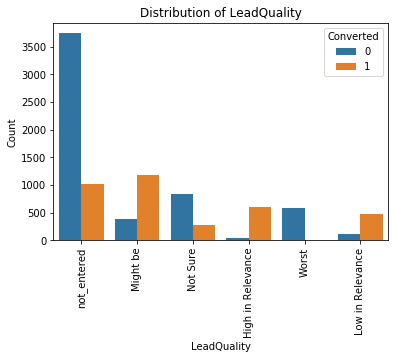

In [21]:
counts = lead_score[['LeadQuality', 'Converted']].value_counts()
counts= counts.reset_index()
#display(counts.reset_index())
sns.barplot(data=counts, hue= 'Converted', x='LeadQuality', y= 0 )

plt.title(f'Distribution of LeadQuality')
plt.xlabel('LeadQuality')
plt.xticks(rotation =90)
plt.ylabel('Count')
plt.show()

We can see that this data has high relevance to the converted target varaible 
1. The nulls are replaced with new category not_entered
2. Not entered, not sure has high chance of not getting converted comapred to High in relevence.

In [22]:
per_null= (lead_score.isnull().sum() *100/lead_score.shape[0])
per_null

ProspectID                                0.000000
LeadNumber                                0.000000
LeadOrigin                                0.000000
LeadSource                                0.389610
DoNotEmail                                0.000000
DoNotCall                                 0.000000
Converted                                 0.000000
TotalVisits                               1.482684
TotalTimeSpentonWebsite                   0.000000
PageViewsPerVisit                         1.482684
LastActivity                              1.114719
Country                                  26.634199
Specialization                           36.580087
HowdidyouhearaboutXEducation             78.463203
Whatisyourcurrentoccupation              29.112554
Whatmattersmosttoyouinchoosingacourse    29.318182
Search                                    0.000000
Magazine                                  0.000000
NewspaperArticle                          0.000000
XEducationForums               

Removing columns with high nan value, more than 40% nan

In [23]:
high_null_cols= [colums_newname[i] for i in range(len(colums_newname)) if per_null[i]>40]
high_null_cols

['HowdidyouhearaboutXEducation',
 'LeadProfile',
 'AsymmetriqueActivityIndex',
 'AsymmetriqueProfileIndex',
 'AsymmetriqueActivityScore',
 'AsymmetriqueProfileScore']

In [24]:
#shape before removing 
lead_score.shape

(9240, 37)

In [25]:
#removing columns with nigh nan values 
lead_score.drop(columns= high_null_cols, inplace= True)
lead_score.shape

(9240, 31)

### Dealing with flag columns - EDA and Data cleaning

In [26]:
lead_score.head()

,ProspectID,LeadNumber,LeadOrigin,LeadSource,DoNotEmail,DoNotCall,Converted,TotalVisits,TotalTimeSpentonWebsite,PageViewsPerVisit,LastActivity,Country,Specialization,Whatisyourcurrentoccupation,Whatmattersmosttoyouinchoosingacourse,Search,Magazine,NewspaperArticle,XEducationForums,Newspaper,DigitalAdvertisement,ThroughRecommendations,ReceiveMoreUpdatesAboutOurCourses,Tags,LeadQuality,UpdatemeonSupplyChainContent,GetupdatesonDMContent,City,Iagreetopaytheamountthroughcheque,AfreecopyofMasteringTheInterview,LastNotableActivity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,NaN,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,not_entered,No,No,NaN,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Mumbai,No,No,Modified


In [27]:
numerics_cols = lead_score.select_dtypes(include=np.number).columns.tolist()
numerics_cols

['LeadNumber',
 'Converted',
 'TotalVisits',
 'TotalTimeSpentonWebsite',
 'PageViewsPerVisit']

In [28]:
columns_names= lead_score.columns.tolist()
text_columns= list(set(columns_names)-set(numerics_cols))
text_columns

['ReceiveMoreUpdatesAboutOurCourses',
 'LeadQuality',
 'Magazine',
 'NewspaperArticle',
 'City',
 'LastNotableActivity',
 'Specialization',
 'DoNotCall',
 'Country',
 'Iagreetopaytheamountthroughcheque',
 'Whatmattersmosttoyouinchoosingacourse',
 'GetupdatesonDMContent',
 'UpdatemeonSupplyChainContent',
 'Whatisyourcurrentoccupation',
 'Tags',
 'DigitalAdvertisement',
 'ProspectID',
 'Newspaper',
 'XEducationForums',
 'DoNotEmail',
 'Search',
 'ThroughRecommendations',
 'LeadOrigin',
 'AfreecopyofMasteringTheInterview',
 'LeadSource',
 'LastActivity']

In [29]:
#understanding text data 
for col in text_columns:
    print(col)
    print(lead_score[col].value_counts(normalize= True), '\n\n')
    print(lead_score[col].isnull().sum()/lead_score.shape[0], '\n\n')
    


ReceiveMoreUpdatesAboutOurCourses
No    1.0
Name: ReceiveMoreUpdatesAboutOurCourses, dtype: float64 


0.0 


LeadQuality
not_entered          0.515909
Might be             0.168831
Not Sure             0.118182
High in Relevance    0.068939
Worst                0.065043
Low in Relevance     0.063095
Name: LeadQuality, dtype: float64 


0.0 


Magazine
No    1.0
Name: Magazine, dtype: float64 


0.0 


NewspaperArticle
No     0.999784
Yes    0.000216
Name: NewspaperArticle, dtype: float64 


0.0 


City
Mumbai                         0.578352
Thane & Outskirts              0.134985
Other Cities                   0.123138
Other Cities of Maharashtra    0.082032
Other Metro Cities             0.068210
Tier II Cities                 0.013283
Name: City, dtype: float64 


0.3970779220779221 


LastNotableActivity
Modified                        0.368723
Email Opened                    0.305952
SMS Sent                        0.235065
Page Visited on Website         0.034416
Olark Chat Conv

### Some problems with the Data
1. Redundant columns, lastactivity and lastNotableActivity seems the same
2. Case issue- Example in leadsource column 'google' and 'Google' is the same, 'welearn' and 'welearblog_home' seems like the same.
3. Flag columns which are not usefull. Some flag columns have 100% as no which will not be of any use to make clasification model. We can discard them.

In [30]:
lead_score[['Iagreetopaytheamountthroughcheque', 'GetupdatesonDMContent', 'ReceiveMoreUpdatesAboutOurCourses', 'Magazine', 'UpdatemeonSupplyChainContent']].value_counts()

Iagreetopaytheamountthroughcheque  GetupdatesonDMContent  ReceiveMoreUpdatesAboutOurCourses  Magazine  UpdatemeonSupplyChainContent
No                                 No                     No                                 No        No                              9240
dtype: int64

In [31]:
'DigitalAdvertisement', 'Search', 'XEducationForums', 'DoNotCall', 'ThroughRecommendations', 'Newspaper', 'NewspaperArticle'

('DigitalAdvertisement',
 'Search',
 'XEducationForums',
 'DoNotCall',
 'ThroughRecommendations',
 'Newspaper',
 'NewspaperArticle')

#### Removing these additional columns since they are not useful for making predictions, 100% of the values are no

In [32]:
lead_score.drop(columns= ['Iagreetopaytheamountthroughcheque', 'GetupdatesonDMContent', 'ReceiveMoreUpdatesAboutOurCourses', 'Magazine', 'UpdatemeonSupplyChainContent'], inplace= True)

Removing the flag columns, with more than 99% as no, since thery are not useful for modelling 

In [33]:
lead_score.drop(columns= ['DigitalAdvertisement', 'Search', 'XEducationForums', 'DoNotCall', 'ThroughRecommendations', 'Newspaper', 'NewspaperArticle'], inplace= True )

#### converting flag columns to numeric columns 

In [34]:
text_columns = list(set(text_columns).intersection(set(lead_score.columns)))
flag_columns=[]
for col in text_columns:
    if lead_score[col].nunique()==2:
        print(col )
        lead_score[col]= lead_score[col].apply(lambda x: 1 if x=='Yes' else 0)
        flag_columns.append(col)
        
        

DoNotEmail
AfreecopyofMasteringTheInterview


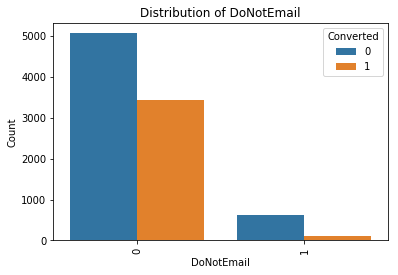

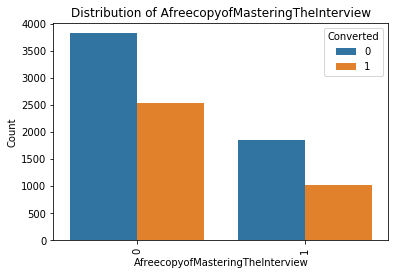

In [35]:
for col in flag_columns:
    counts = lead_score[[col, 'Converted']].value_counts()
    counts= counts.reset_index()
    #display(counts.reset_index())
    sns.barplot(data=counts, hue= 'Converted', x=col, y= 0 )
    
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.xticks(rotation =90)
    plt.ylabel('Count')
    plt.show()

In [36]:
lead_score.head()

,ProspectID,LeadNumber,LeadOrigin,LeadSource,DoNotEmail,Converted,TotalVisits,TotalTimeSpentonWebsite,PageViewsPerVisit,LastActivity,Country,Specialization,Whatisyourcurrentoccupation,Whatmattersmosttoyouinchoosingacourse,Tags,LeadQuality,City,AfreecopyofMasteringTheInterview,LastNotableActivity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,Unemployed,Better Career Prospects,Interested in other courses,Low in Relevance,NaN,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,5.0,674,2.5,Email Opened,India,NaN,Unemployed,Better Career Prospects,Ringing,not_entered,NaN,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,Will revert after reading the email,Might be,Mumbai,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,Ringing,Not Sure,Mumbai,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,India,NaN,Unemployed,Better Career Prospects,Will revert after reading the email,Might be,Mumbai,0,Modified


Dealing with remaning categorical columns 

In [37]:
#remaning text columns for processing 
print(len(text_columns))
text_columns= list(set(text_columns).intersection(set(lead_score.columns)))
len(text_columns)

14


14

Checking if Null values provide any useful information

In [38]:
lead_score[lead_score.Converted ==1][text_columns].isnull().sum()/lead_score[lead_score.Converted ==1].shape[0]

DoNotEmail                               0.000000
LeadQuality                              0.000000
LastNotableActivity                      0.000000
City                                     0.352991
Specialization                           0.272115
LeadOrigin                               0.000000
Country                                  0.302162
AfreecopyofMasteringTheInterview         0.000000
Whatmattersmosttoyouinchoosingacourse    0.103903
Whatisyourcurrentoccupation              0.103903
LeadSource                               0.008144
Tags                                     0.234766
ProspectID                               0.000000
LastActivity                             0.022746
dtype: float64

In [39]:
lead_score[lead_score.Converted ==0][text_columns].isnull().sum()/lead_score[lead_score.Converted ==0].shape[0]

DoNotEmail                               0.000000
LeadQuality                              0.000000
LastNotableActivity                      0.000000
City                                     0.424723
Specialization                           0.424547
LeadOrigin                               0.000000
Country                                  0.243881
AfreecopyofMasteringTheInterview         0.000000
Whatmattersmosttoyouinchoosingacourse    0.411868
Whatisyourcurrentoccupation              0.408523
LeadSource                               0.001233
Tags                                     0.443212
ProspectID                               0.000000
LastActivity                             0.003874
dtype: float64

#### Observation :
We can see that Whatmattersmosttoyouinchoosingacourse and occupation is null mostly for non converted data. So we can use this information to add a new catgeory for these null values. 

In [40]:
# google and Google where treated as different categories. So converting all values to lower case
lead_score['LeadSource']= lead_score.LeadSource.str.lower()

In [41]:
text_columns

['DoNotEmail',
 'LeadQuality',
 'LastNotableActivity',
 'City',
 'Specialization',
 'LeadOrigin',
 'Country',
 'AfreecopyofMasteringTheInterview',
 'Whatmattersmosttoyouinchoosingacourse',
 'Whatisyourcurrentoccupation',
 'LeadSource',
 'Tags',
 'ProspectID',
 'LastActivity']

In [42]:
for col in text_columns:
    print("***",col,"***")
    print(lead_score[col].value_counts(normalize=True))
    print("null count",lead_score[col].isnull().sum()/lead_score.shape[0], "\n\n")

*** DoNotEmail ***
0    0.920563
1    0.079437
Name: DoNotEmail, dtype: float64
null count 0.0 


*** LeadQuality ***
not_entered          0.515909
Might be             0.168831
Not Sure             0.118182
High in Relevance    0.068939
Worst                0.065043
Low in Relevance     0.063095
Name: LeadQuality, dtype: float64
null count 0.0 


*** LastNotableActivity ***
Modified                        0.368723
Email Opened                    0.305952
SMS Sent                        0.235065
Page Visited on Website         0.034416
Olark Chat Conversation         0.019805
Email Link Clicked              0.018723
Email Bounced                   0.006494
Unsubscribed                    0.005087
Unreachable                     0.003463
Had a Phone Conversation        0.001515
Email Marked Spam               0.000216
Form Submitted on Website       0.000108
Resubscribed to emails          0.000108
Email Received                  0.000108
Approached upfront              0.000108
View in

### Analysis 
1. Rmoving city column, has almost 40% NaN values and 57% of the data has Mumbai as values. Imputing with Mumbai will skew the data.
2. Drop tags column, whcich is a text data with 36% nan values, imputing will skew the data and can't drop 36% of Data.
3. WhatmattersMostwhilechoosingthecourse going to impute the missing values with not_provided
4. Imputing other categorical columns with the frequent occuring category
5. Dropping Country column, it has 26% nan and India occurs 95% of the time. Imputing with India will not help the modelling. 

In [43]:
lead_score.drop(columns= ['City', 'Tags', 'LastActivity', 'Country'], inplace =True )

In [44]:
# Imputing values as per the above observations/insights 

missing_values={'Specialization':'Others','LeadSource':'google',
               'Whatisyourcurrentoccupation':'Unemployed', 'Whatmattersmosttoyouinchoosingacourse': 'not_provided'}

lead_score = lead_score.fillna(value=missing_values)

In [45]:
text_columns= list(set(text_columns).intersection(set(lead_score.columns)))



lead_score[text_columns].head()

,DoNotEmail,LeadQuality,LastNotableActivity,Specialization,LeadOrigin,AfreecopyofMasteringTheInterview,Whatmattersmosttoyouinchoosingacourse,Whatisyourcurrentoccupation,LeadSource,ProspectID
0,0,Low in Relevance,Modified,Others,API,0,Better Career Prospects,Unemployed,olark chat,7927b2df-8bba-4d29-b9a2-b6e0beafe620
1,0,not_entered,Email Opened,Others,API,0,Better Career Prospects,Unemployed,organic search,2a272436-5132-4136-86fa-dcc88c88f482
2,0,Might be,Email Opened,Business Administration,Landing Page Submission,1,Better Career Prospects,Student,direct traffic,8cc8c611-a219-4f35-ad23-fdfd2656bd8a
3,0,Not Sure,Modified,Media and Advertising,Landing Page Submission,0,Better Career Prospects,Unemployed,direct traffic,0cc2df48-7cf4-4e39-9de9-19797f9b38cc
4,0,Might be,Modified,Others,Landing Page Submission,0,Better Career Prospects,Unemployed,google,3256f628-e534-4826-9d63-4a8b88782852


In [46]:
#checking for any nan or unwanted columns 
for col in text_columns:
    print("***",col,"***")
    print(lead_score[col].value_counts(normalize=True))
    print("null count",lead_score[col].isnull().sum()/lead_score.shape[0], "\n\n")

*** DoNotEmail ***
0    0.920563
1    0.079437
Name: DoNotEmail, dtype: float64
null count 0.0 


*** LeadQuality ***
not_entered          0.515909
Might be             0.168831
Not Sure             0.118182
High in Relevance    0.068939
Worst                0.065043
Low in Relevance     0.063095
Name: LeadQuality, dtype: float64
null count 0.0 


*** LastNotableActivity ***
Modified                        0.368723
Email Opened                    0.305952
SMS Sent                        0.235065
Page Visited on Website         0.034416
Olark Chat Conversation         0.019805
Email Link Clicked              0.018723
Email Bounced                   0.006494
Unsubscribed                    0.005087
Unreachable                     0.003463
Had a Phone Conversation        0.001515
Email Marked Spam               0.000216
Form Submitted on Website       0.000108
Resubscribed to emails          0.000108
Email Received                  0.000108
Approached upfront              0.000108
View in

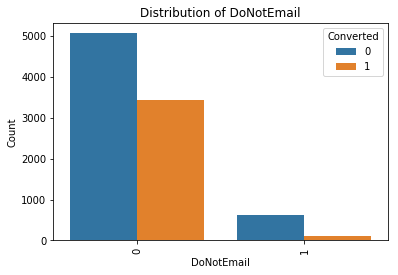

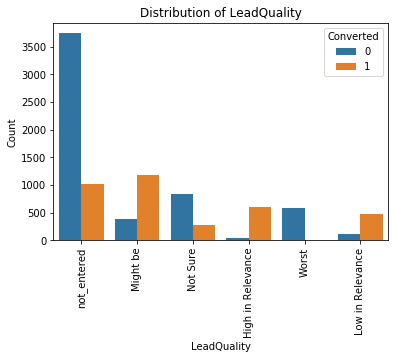

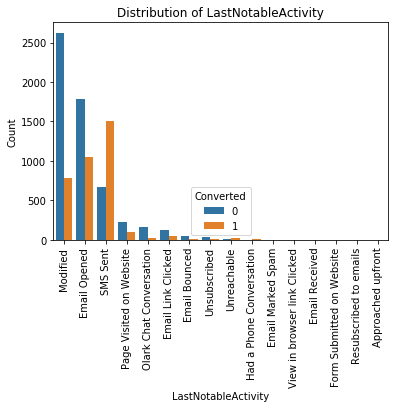

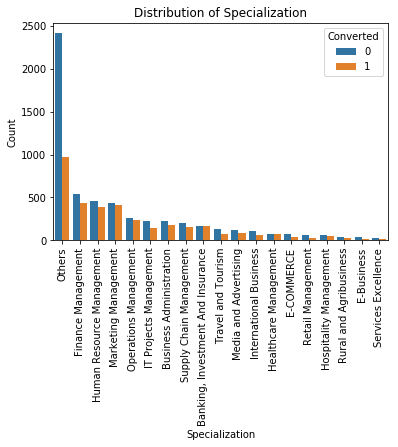

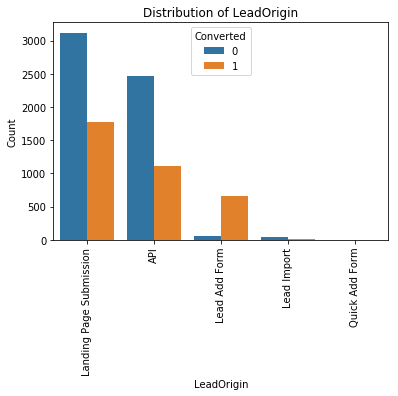

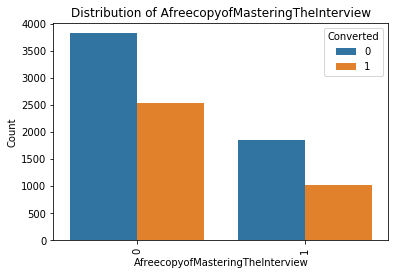

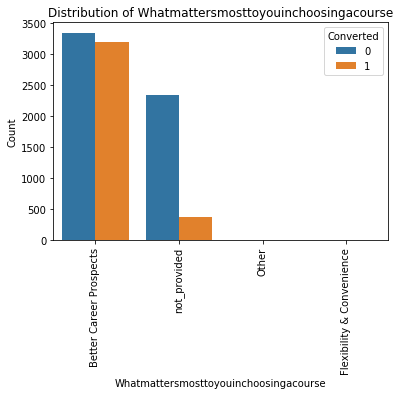

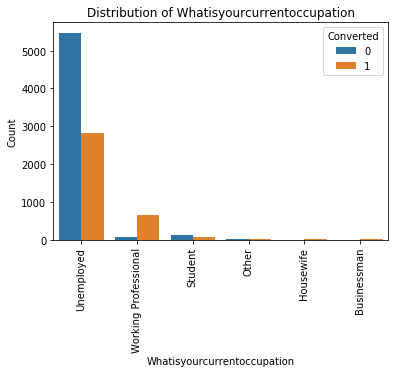

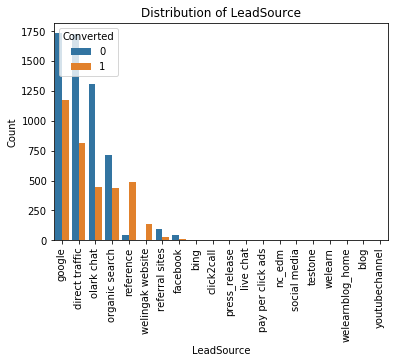

In [47]:
for col in text_columns:
    if col == 'ProspectID':
        continue
    counts = lead_score[[col, 'Converted']].value_counts()
    counts= counts.reset_index()
    #display(counts.reset_index())
    sns.barplot(data=counts, hue= 'Converted', x=col, y= 0 )
    
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.xticks(rotation =90)
    plt.ylabel('Count')
    plt.show()

### Converting Categorical variables to dummy variables

In [48]:
#removing prospect id not useful for modelling 

text_columns.remove('ProspectID')

In [49]:
# Create dummy variables using the 'get_dummies' command
dummy = pd.get_dummies(lead_score[text_columns], drop_first=True)
dummy.shape

(9240, 71)

In [50]:
dummy.head()

,DoNotEmail,AfreecopyofMasteringTheInterview,LeadQuality_Low in Relevance,LeadQuality_Might be,LeadQuality_Not Sure,LeadQuality_Worst,LeadQuality_not_entered,LastNotableActivity_Email Bounced,LastNotableActivity_Email Link Clicked,LastNotableActivity_Email Marked Spam,LastNotableActivity_Email Opened,LastNotableActivity_Email Received,LastNotableActivity_Form Submitted on Website,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Page Visited on Website,LastNotableActivity_Resubscribed to emails,LastNotableActivity_SMS Sent,LastNotableActivity_Unreachable,LastNotableActivity_Unsubscribed,LastNotableActivity_View in browser link Clicked,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,LeadOrigin_Landing Page Submission,LeadOrigin_Lead Add Form,LeadOrigin_Lead Import,LeadOrigin_Quick Add Form,Whatmattersmosttoyouinchoosingacourse_Flexibility & Convenience,Whatmattersmosttoyouinchoosingacourse_Other,Whatmattersmosttoyouinchoosingacourse_not_provided,Whatisyourcurrentoccupation_Housewife,Whatisyourcurrentoccupation_Other,Whatisyourcurrentoccupation_Student,Whatisyourcurrentoccupation_Unemployed,Whatisyourcurrentoccupation_Working Professional,LeadSource_blog,LeadSource_click2call,LeadSource_direct traffic,LeadSource_facebook,LeadSource_google,LeadSource_live chat,LeadSource_nc_edm,LeadSource_olark chat,LeadSource_organic search,LeadSource_pay per click ads,LeadSource_press_release,LeadSource_reference,LeadSource_referral sites,LeadSource_social media,LeadSource_testone,LeadSource_welearn,LeadSource_welearnblog_home,LeadSource_welingak website,LeadSource_youtubechannel
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [51]:
lead_score.head()

,ProspectID,LeadNumber,LeadOrigin,LeadSource,DoNotEmail,Converted,TotalVisits,TotalTimeSpentonWebsite,PageViewsPerVisit,Specialization,Whatisyourcurrentoccupation,Whatmattersmosttoyouinchoosingacourse,LeadQuality,AfreecopyofMasteringTheInterview,LastNotableActivity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,olark chat,0,0,0.0,0,0.0,Others,Unemployed,Better Career Prospects,Low in Relevance,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,organic search,0,0,5.0,674,2.5,Others,Unemployed,Better Career Prospects,not_entered,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,direct traffic,0,1,2.0,1532,2.0,Business Administration,Student,Better Career Prospects,Might be,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,direct traffic,0,0,1.0,305,1.0,Media and Advertising,Unemployed,Better Career Prospects,Not Sure,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,google,0,1,2.0,1428,1.0,Others,Unemployed,Better Career Prospects,Might be,0,Modified


## Dealing with numerical columns and outliers

In [52]:
lead_score.isnull().sum() *100/lead_score.shape[0]

ProspectID                               0.000000
LeadNumber                               0.000000
LeadOrigin                               0.000000
LeadSource                               0.000000
DoNotEmail                               0.000000
Converted                                0.000000
TotalVisits                              1.482684
TotalTimeSpentonWebsite                  0.000000
PageViewsPerVisit                        1.482684
Specialization                           0.000000
Whatisyourcurrentoccupation              0.000000
Whatmattersmosttoyouinchoosingacourse    0.000000
LeadQuality                              0.000000
AfreecopyofMasteringTheInterview         0.000000
LastNotableActivity                      0.000000
dtype: float64

In [53]:
#filling missing values with mode 
for col in ["TotalVisits", "PageViewsPerVisit"]:
    lead_score[col].fillna(lead_score[col].mode()[0], inplace=True)

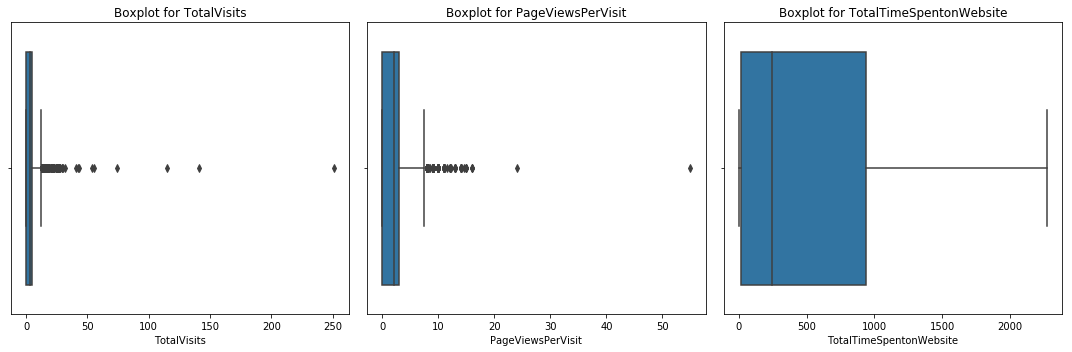

In [54]:
# Plotting the boxplot for the Numerical Columns before treating the Outliers


num_cols = ["TotalVisits", "PageViewsPerVisit", "TotalTimeSpentonWebsite"]
numeric_columns = lead_score[num_cols]

# Creating subplots
fig, axes = plt.subplots(nrows=1, ncols=len(num_cols), figsize=(15, 5))

# Plotting boxplots for each numeric column
for i, col in enumerate(num_cols):
    sns.boxplot(x=numeric_columns[col], ax=axes[i])
    axes[i].set_title(f'Boxplot for {col}')

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()



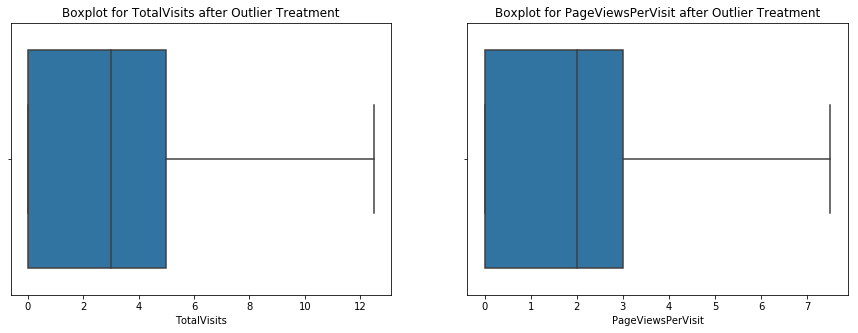

In [55]:
# Plotting the boxplot for the Numerical Columns after treating the Outliers

def treat_outliers(data, columns):
    for column in columns:
        q1, q3 = data[column].quantile([0.25, 0.75])
        iqr = q3 - q1

        upper_bound = q3 + 1.5 * iqr
        lower_bound = q1 - 1.5 * iqr

        # Capping and flooring
        data[column] = np.clip(data[column], lower_bound, upper_bound)

# Columns to treat outliers
outlier_columns = ["TotalVisits", "PageViewsPerVisit"]

# Applying the outlier treatment function
treat_outliers(lead_score, outlier_columns)



plt.figure(figsize=(15, 5))
for idx, col in enumerate(outlier_columns, 1):
    plt.subplot(1, len(outlier_columns), idx)
    sns.boxplot(x=lead_score[col])
    plt.title(f'Boxplot for {col} after Outlier Treatment')

plt.show()


<Figure size 1152x576 with 0 Axes>

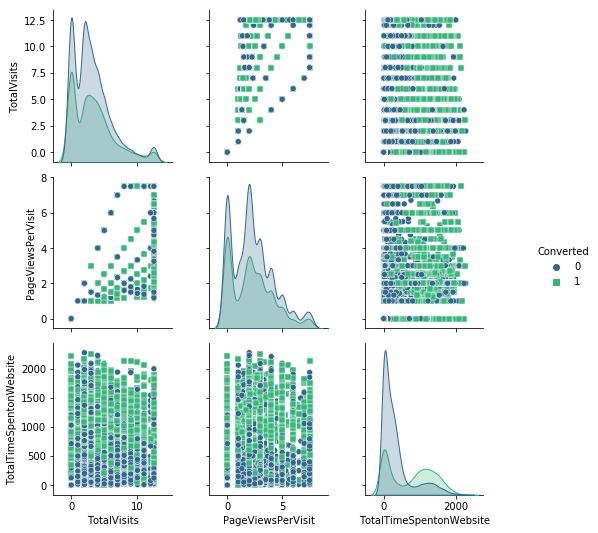

In [56]:
#Pairplot of the Numerical Columns with Converted Columns 

num_cols = ["TotalVisits", "PageViewsPerVisit", "TotalTimeSpentonWebsite"]

# Set up the pairplot with hue as "Converted"
plt.figure(figsize=(16, 8))
sns.pairplot(data=lead_score, vars=num_cols, hue="Converted", diag_kind="kde", palette="viridis", markers=["o", "s"])

plt.show()


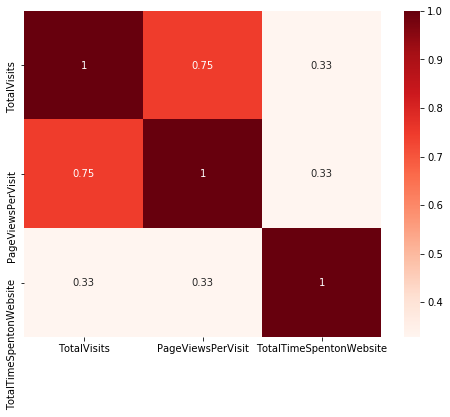

In [57]:

# Heatmap to show correlation between numerical variables
plt.figure(figsize=(8, 6))
sns.heatmap(data=lead_score[num_cols].corr(), cmap="Reds", annot=True)

plt.show()


#### Observation:
We can see that pageViewPerVisit is highly correlated with Totalvisits. 
This feature is latter dropped due to high VIF

### Combining numerical and text data 

In [58]:
#combining with main dataframe, dropping the categorical columns 
lead_score.drop(columns= text_columns, inplace= True)
lead_score = pd.concat([lead_score, dummy], axis=1)
lead_score.shape

(9240, 77)

Dropping ProspectID and LeadNumber, since they are not useful for modelling 

In [59]:
lead_score.drop(columns= ['ProspectID', 'LeadNumber'], inplace= True )

In [60]:
lead_score.head(3)

,Converted,TotalVisits,TotalTimeSpentonWebsite,PageViewsPerVisit,DoNotEmail,AfreecopyofMasteringTheInterview,LeadQuality_Low in Relevance,LeadQuality_Might be,LeadQuality_Not Sure,LeadQuality_Worst,LeadQuality_not_entered,LastNotableActivity_Email Bounced,LastNotableActivity_Email Link Clicked,LastNotableActivity_Email Marked Spam,LastNotableActivity_Email Opened,LastNotableActivity_Email Received,LastNotableActivity_Form Submitted on Website,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Page Visited on Website,LastNotableActivity_Resubscribed to emails,LastNotableActivity_SMS Sent,LastNotableActivity_Unreachable,LastNotableActivity_Unsubscribed,LastNotableActivity_View in browser link Clicked,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,LeadOrigin_Landing Page Submission,LeadOrigin_Lead Add Form,LeadOrigin_Lead Import,LeadOrigin_Quick Add Form,Whatmattersmosttoyouinchoosingacourse_Flexibility & Convenience,Whatmattersmosttoyouinchoosingacourse_Other,Whatmattersmosttoyouinchoosingacourse_not_provided,Whatisyourcurrentoccupation_Housewife,Whatisyourcurrentoccupation_Other,Whatisyourcurrentoccupation_Student,Whatisyourcurrentoccupation_Unemployed,Whatisyourcurrentoccupation_Working Professional,LeadSource_blog,LeadSource_click2call,LeadSource_direct traffic,LeadSource_facebook,LeadSource_google,LeadSource_live chat,LeadSource_nc_edm,LeadSource_olark chat,LeadSource_organic search,LeadSource_pay per click ads,LeadSource_press_release,LeadSource_reference,LeadSource_referral sites,LeadSource_social media,LeadSource_testone,LeadSource_welearn,LeadSource_welearnblog_home,LeadSource_welingak website,LeadSource_youtubechannel
0,0,0.0,0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Modelling 

Splitting the data 

In [61]:
#seperateing x and y 
X= lead_score.drop(columns= 'Converted')
Y= lead_score['Converted']

In [62]:
X.shape, Y.shape

((9240, 74), (9240,))

In [63]:
#splitting data 
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, test_size=0.3, random_state=100)

In [64]:
X_train.head()

,TotalVisits,TotalTimeSpentonWebsite,PageViewsPerVisit,DoNotEmail,AfreecopyofMasteringTheInterview,LeadQuality_Low in Relevance,LeadQuality_Might be,LeadQuality_Not Sure,LeadQuality_Worst,LeadQuality_not_entered,LastNotableActivity_Email Bounced,LastNotableActivity_Email Link Clicked,LastNotableActivity_Email Marked Spam,LastNotableActivity_Email Opened,LastNotableActivity_Email Received,LastNotableActivity_Form Submitted on Website,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Page Visited on Website,LastNotableActivity_Resubscribed to emails,LastNotableActivity_SMS Sent,LastNotableActivity_Unreachable,LastNotableActivity_Unsubscribed,LastNotableActivity_View in browser link Clicked,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,LeadOrigin_Landing Page Submission,LeadOrigin_Lead Add Form,LeadOrigin_Lead Import,LeadOrigin_Quick Add Form,Whatmattersmosttoyouinchoosingacourse_Flexibility & Convenience,Whatmattersmosttoyouinchoosingacourse_Other,Whatmattersmosttoyouinchoosingacourse_not_provided,Whatisyourcurrentoccupation_Housewife,Whatisyourcurrentoccupation_Other,Whatisyourcurrentoccupation_Student,Whatisyourcurrentoccupation_Unemployed,Whatisyourcurrentoccupation_Working Professional,LeadSource_blog,LeadSource_click2call,LeadSource_direct traffic,LeadSource_facebook,LeadSource_google,LeadSource_live chat,LeadSource_nc_edm,LeadSource_olark chat,LeadSource_organic search,LeadSource_pay per click ads,LeadSource_press_release,LeadSource_reference,LeadSource_referral sites,LeadSource_social media,LeadSource_testone,LeadSource_welearn,LeadSource_welearnblog_home,LeadSource_welingak website,LeadSource_youtubechannel
1871,0.0,0,0.00,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
6795,4.0,487,1.33,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3516,5.0,106,2.50,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
8105,5.0,1230,5.00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3934,0.0,0,0.00,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


Scaling the numeric variables 

In [65]:

scaler = MinMaxScaler()

X_train[['TotalVisits', 'PageViewsPerVisit', 'TotalTimeSpentonWebsite']] = scaler.fit_transform(X_train[['TotalVisits', 'PageViewsPerVisit', 'TotalTimeSpentonWebsite']])

X_train.head()

,TotalVisits,TotalTimeSpentonWebsite,PageViewsPerVisit,DoNotEmail,AfreecopyofMasteringTheInterview,LeadQuality_Low in Relevance,LeadQuality_Might be,LeadQuality_Not Sure,LeadQuality_Worst,LeadQuality_not_entered,LastNotableActivity_Email Bounced,LastNotableActivity_Email Link Clicked,LastNotableActivity_Email Marked Spam,LastNotableActivity_Email Opened,LastNotableActivity_Email Received,LastNotableActivity_Form Submitted on Website,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Page Visited on Website,LastNotableActivity_Resubscribed to emails,LastNotableActivity_SMS Sent,LastNotableActivity_Unreachable,LastNotableActivity_Unsubscribed,LastNotableActivity_View in browser link Clicked,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,LeadOrigin_Landing Page Submission,LeadOrigin_Lead Add Form,LeadOrigin_Lead Import,LeadOrigin_Quick Add Form,Whatmattersmosttoyouinchoosingacourse_Flexibility & Convenience,Whatmattersmosttoyouinchoosingacourse_Other,Whatmattersmosttoyouinchoosingacourse_not_provided,Whatisyourcurrentoccupation_Housewife,Whatisyourcurrentoccupation_Other,Whatisyourcurrentoccupation_Student,Whatisyourcurrentoccupation_Unemployed,Whatisyourcurrentoccupation_Working Professional,LeadSource_blog,LeadSource_click2call,LeadSource_direct traffic,LeadSource_facebook,LeadSource_google,LeadSource_live chat,LeadSource_nc_edm,LeadSource_olark chat,LeadSource_organic search,LeadSource_pay per click ads,LeadSource_press_release,LeadSource_reference,LeadSource_referral sites,LeadSource_social media,LeadSource_testone,LeadSource_welearn,LeadSource_welearnblog_home,LeadSource_welingak website,LeadSource_youtubechannel
1871,0.00,0.000000,0.000000,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
6795,0.32,0.214349,0.177333,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3516,0.40,0.046655,0.333333,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
8105,0.40,0.541373,0.666667,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3934,0.00,0.000000,0.000000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [66]:
X_train[['TotalVisits', 'PageViewsPerVisit', 'TotalTimeSpentonWebsite']].describe()

,TotalVisits,PageViewsPerVisit,TotalTimeSpentonWebsite
count,6468.000000,6468.000000,6468.000000
mean,0.256747,0.301820,0.212974
std,0.241102,0.254744,0.240566
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.005282
50%,0.240000,0.266667,0.108275
75%,0.400000,0.400000,0.407790
max,1.000000,1.000000,1.000000


In [67]:
X_train.shape

(6468, 74)

### Building model - Train 


In [68]:
X_train.isnull().sum()

TotalVisits                         0
TotalTimeSpentonWebsite             0
PageViewsPerVisit                   0
DoNotEmail                          0
AfreecopyofMasteringTheInterview    0
                                   ..
LeadSource_testone                  0
LeadSource_welearn                  0
LeadSource_welearnblog_home         0
LeadSource_welingak website         0
LeadSource_youtubechannel           0
Length: 74, dtype: int64

In [69]:
from sklearn.metrics import accuracy_score

In [70]:
def log_regression(X_train,X_test, cols, cutoff):
#     lr_instance = LogisticRegression()
#     lr_instance.fit(X_train[cols],y_train)
    X_train_model= sm.add_constant(X_train[cols])
    X_test_model= sm.add_constant(X_test[cols])
    
    lr_instance = sm.GLM(y_train,X_train_model, family = sm.families.Binomial())
    res= lr_instance.fit()
    print(res.summary())
    
    #checking scores
    predicted_train = res.predict(X_train_model)
    predicted_train= predicted_train.apply(lambda x: 0 if x<=cutoff else 1)
#     print("Train Accuracy \n",accuracy_score(y_train, predicted_train))
      
    predicted_test = res.predict(X_test_model)
    predicted_test= predicted_test.apply(lambda x: 0 if x<=cutoff else 1)
    #print(predicted_train.unique(), predicted_test.shape)
    #display(predicted_train.head())
#     print("Test Accuracy \n",accuracy_score(y_test, predicted_test))
          
#     print("Train Accuracy")
#     print(res.score(X_train_model,y_train))
#     print("Test Accuracy")
#     print(res.score(X_test_model,y_test))
    print("Confusion matrix train \n",confusion_matrix(y_train,predicted_train))
    print("classification report train \n", classification_report(y_train,predicted_train))
    
    print("Confusion matrix test \n",confusion_matrix(y_test,predicted_test))
    print("classification report test\n", classification_report(y_test,predicted_test))
    return res


In [71]:
cols= list(X_train.columns)

### Treating test data before prediction and evaluation 
1. Transforming numerical data using the already fit MinMax scaler. 
2. Selecting column only are used in training 
3. Adding a constant variable before modelling 

In [72]:
X_test[['TotalVisits', 'PageViewsPerVisit', 'TotalTimeSpentonWebsite']] = scaler.transform(X_test[['TotalVisits', 'PageViewsPerVisit', 'TotalTimeSpentonWebsite']])
   

In [73]:
X_test[['TotalVisits', 'PageViewsPerVisit', 'TotalTimeSpentonWebsite']].describe()

,TotalVisits,PageViewsPerVisit,TotalTimeSpentonWebsite
count,2772.000000,2772.000000,2772.000000
mean,0.257951,0.306858,0.218582
std,0.238832,0.257941,0.242693
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.005722
50%,0.240000,0.266667,0.113556
75%,0.400000,0.466667,0.417694
max,1.000000,1.000000,0.991637


In [74]:
model =log_regression(X_train,X_test, cols, cutoff= 0.5)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6396
Model Family:                Binomial   Df Model:                           71
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 21 Nov 2023   Deviance:                          nan
Time:                        13:17:12   Pearson chi2:                 6.89e+18
No. Iterations:                   100   Covariance Type:             nonrobust
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
const                    

Predict on test data

### Analysis 
The model is overfitting since we have too many features, the features are correlated and perform poorly on a test data. 


### Using rfe to select only top 15 features.

In [75]:
logreg = LogisticRegression()

In [76]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 13 variables as output
rfe = rfe.fit(X_train, y_train)

In [77]:
rfe.support_
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('TotalTimeSpentonWebsite', True, 1),
 ('PageViewsPerVisit', True, 1),
 ('DoNotEmail', True, 1),
 ('AfreecopyofMasteringTheInterview', False, 49),
 ('LeadQuality_Low in Relevance', False, 13),
 ('LeadQuality_Might be', True, 1),
 ('LeadQuality_Not Sure', True, 1),
 ('LeadQuality_Worst', True, 1),
 ('LeadQuality_not_entered', True, 1),
 ('LastNotableActivity_Email Bounced', False, 52),
 ('LastNotableActivity_Email Link Clicked', False, 14),
 ('LastNotableActivity_Email Marked Spam', False, 55),
 ('LastNotableActivity_Email Opened', False, 22),
 ('LastNotableActivity_Email Received', False, 56),
 ('LastNotableActivity_Form Submitted on Website', False, 47),
 ('LastNotableActivity_Had a Phone Conversation', True, 1),
 ('LastNotableActivity_Modified', False, 11),
 ('LastNotableActivity_Olark Chat Conversation', False, 5),
 ('LastNotableActivity_Page Visited on Website', False, 19),
 ('LastNotableActivity_Resubscribed to emails', False, 6),
 ('LastNotableActivity

In [78]:
col_rfe = list(X_train.columns[rfe.support_])
len(col_rfe)

15

In [79]:
col_rfe

['TotalVisits',
 'TotalTimeSpentonWebsite',
 'PageViewsPerVisit',
 'DoNotEmail',
 'LeadQuality_Might be',
 'LeadQuality_Not Sure',
 'LeadQuality_Worst',
 'LeadQuality_not_entered',
 'LastNotableActivity_Had a Phone Conversation',
 'LastNotableActivity_SMS Sent',
 'LastNotableActivity_Unreachable',
 'LeadOrigin_Lead Add Form',
 'Whatisyourcurrentoccupation_Working Professional',
 'LeadSource_olark chat',
 'LeadSource_welingak website']

In [80]:
log_regression(X_train, X_test, col_rfe, 0.5)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2244.7
Date:                Tue, 21 Nov 2023   Deviance:                       4489.3
Time:                        13:17:20   Pearson chi2:                 6.73e+03
No. Iterations:                     7   Covariance Type:             nonrobust
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                                0.

### Results:
1. Using only top 15 features has improved the accuracy from 77% to 85%
2. Now we can only remove features with high VIF and p-value

In [81]:
# Make a VIF dataframe for all the variables present
def vif_df(cols):
    vif = pd.DataFrame()
    vif['Features'] = X_train[cols].columns
    vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    display(vif)

In [82]:
vif_df(col_rfe)

,Features,VIF
2,PageViewsPerVisit,5.95
0,TotalVisits,4.79
7,LeadQuality_not_entered,2.89
1,TotalTimeSpentonWebsite,2.00
4,LeadQuality_Might be,1.94
13,LeadSource_olark chat,1.75
9,LastNotableActivity_SMS Sent,1.59
5,LeadQuality_Not Sure,1.47
11,LeadOrigin_Lead Add Form,1.43
12,Whatisyourcurrentoccupation_Working Professional,1.30


PageViewsPerVisit column had high VIF removing this column

In [83]:
col_rfe.remove('PageViewsPerVisit')
len(col_rfe)

14

In [84]:

model1= log_regression(X_train, X_test, col_rfe, 0.5)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2256.6
Date:                Tue, 21 Nov 2023   Deviance:                       4513.3
Time:                        13:17:20   Pearson chi2:                 6.79e+03
No. Iterations:                     7   Covariance Type:             nonrobust
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                               -0.

In [85]:
vif_df(col_rfe)

,Features,VIF
0,TotalVisits,2.64
6,LeadQuality_not_entered,2.55
1,TotalTimeSpentonWebsite,1.96
3,LeadQuality_Might be,1.87
12,LeadSource_olark chat,1.62
8,LastNotableActivity_SMS Sent,1.57
10,LeadOrigin_Lead Add Form,1.41
4,LeadQuality_Not Sure,1.38
11,Whatisyourcurrentoccupation_Working Professional,1.30
13,LeadSource_welingak website,1.26


Removing LastNotableActivity_Had a Phone Conversation becasue of high p value

In [86]:
col_rfe.remove('LastNotableActivity_Had a Phone Conversation')
len(col_rfe)

13

In [87]:

final_model = log_regression(X_train, X_test, col_rfe, 0.5)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2259.5
Date:                Tue, 21 Nov 2023   Deviance:                       4519.1
Time:                        13:17:20   Pearson chi2:                 6.79e+03
No. Iterations:                     7   Covariance Type:             nonrobust
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                               -0.

In [88]:
vif_df(col_rfe)

,Features,VIF
0,TotalVisits,2.63
6,LeadQuality_not_entered,2.54
1,TotalTimeSpentonWebsite,1.96
3,LeadQuality_Might be,1.87
11,LeadSource_olark chat,1.62
7,LastNotableActivity_SMS Sent,1.57
9,LeadOrigin_Lead Add Form,1.41
4,LeadQuality_Not Sure,1.38
10,Whatisyourcurrentoccupation_Working Professional,1.30
12,LeadSource_welingak website,1.26


## Model Evaluation

In [89]:
#getting final predictions
y_pred_train= pd.DataFrame()
y_pred_test= pd.DataFrame()

y_pred_train['y_pred_prob'] = final_model.predict(sm.add_constant(X_train[col_rfe]))
y_pred_train['y_train'] = y_train.values

y_pred_test['y_pred_prob'] = final_model.predict(sm.add_constant(X_test[col_rfe]))
y_pred_test['y_test'] = y_test.values

In [90]:
y_pred_train.head()

,y_pred_prob,y_train
1871,0.097166,0
6795,0.107989,0
3516,0.194318,0
8105,0.935282,0
3934,0.128214,0


In [91]:
#using a default 0.5 as cutoff 
y_pred_train['prediction_0.5'] = y_pred_train.y_pred_prob.apply(lambda x : 0 if x<0.5 else 1)

In [92]:
#confusion metrics 
confusion_metrics = metrics.confusion_matrix(y_train, y_pred_train['prediction_0.5'])
print("confusion metrics for training data ")
print(confusion_metrics)

confusion metrics for training data 
[[3638  364]
 [ 619 1847]]


In [93]:
TP = confusion_metrics[1,1] 
TN = confusion_metrics[0,0] 
FP = confusion_metrics[0,1] 
FN = confusion_metrics[1,0] 

In [94]:
# sensitivity- how good with predicting 1's
print("sensitivity for train")
TP/(TP+FN)

sensitivity for train


0.7489862124898621

In [95]:
# specificity- how good in predicting zeros 
print("specificity for train")
TN/(TN+FP)

specificity for train


0.9090454772613693

### Finding the best cutoff- using sensitivity and Specificity trade off

In [96]:
# ROC curve

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()


In [97]:
fpr, tpr, thresholds = metrics.roc_curve( y_train, y_pred_train['y_pred_prob'], drop_intermediate = False )
fpr, tpr, thresholds

(array([0.        , 0.        , 0.        , ..., 0.99950025, 0.99975012,
        1.        ]),
 array([0.00000000e+00, 4.05515004e-04, 8.11030008e-04, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00]),
 array([1.99981222e+00, 9.99812216e-01, 9.99625773e-01, ...,
        2.15305869e-03, 2.11310866e-03, 1.98873744e-03]))

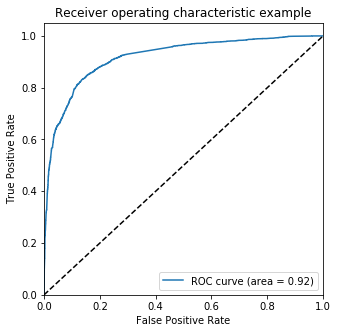

In [98]:
#plot roc curve
draw_roc(y_train, y_pred_train['y_pred_prob'])

0.92 is a very good AOC

In [99]:
# get predictions for different cutoffs

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_train['prediction_' + str(i)]= y_pred_train.y_pred_prob.map(lambda x: 1 if x > i else 0)
y_pred_train.head()

,y_pred_prob,y_train,prediction_0.5,prediction_0.0,prediction_0.1,prediction_0.2,prediction_0.3,prediction_0.4,prediction_0.6,prediction_0.7,prediction_0.8,prediction_0.9
1871,0.097166,0,0,1,0,0,0,0,0,0,0,0
6795,0.107989,0,0,1,1,0,0,0,0,0,0,0
3516,0.194318,0,0,1,1,0,0,0,0,0,0,0
8105,0.935282,0,1,1,1,1,1,1,1,1,1,1
3934,0.128214,0,0,1,1,0,0,0,0,0,0,0


In [100]:
# Let's create a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
#from sklearn.metrics import confusion_matrix


num = [float(x)/10 for x in range(10)]
for i in num:
    cm = metrics.confusion_matrix(y_train, y_pred_train['prediction_'+str(i)] )
    total1=sum(sum(cm))
    accuracy = (cm[0,0]+cm[1,1])/total1

    speci = cm[0,0]/(cm[0,0]+cm[0,1])
    sensi = cm[1,1]/(cm[1,0]+cm[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.679808  0.964720  0.504248
0.2   0.2  0.811379  0.909165  0.751124
0.3   0.3  0.839981  0.858881  0.828336
0.4   0.4  0.854669  0.813463  0.880060
0.5   0.5  0.848021  0.748986  0.909045
0.6   0.6  0.841528  0.699513  0.929035
0.7   0.7  0.837508  0.645174  0.956022
0.8   0.8  0.812925  0.551095  0.974263
0.9   0.9  0.774583  0.431873  0.985757


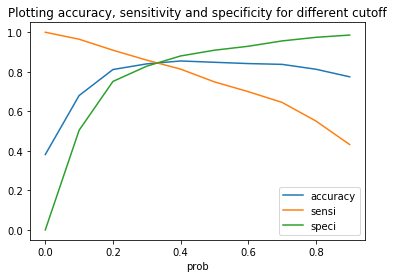

In [101]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.title("Plotting accuracy, sensitivity and specificity for different cutoff")
plt.show()

Let us choose 0.39 as our cutoff

Calculate metrics with the obtained cutoff

In [102]:
y_pred_train['selected_prediction']= y_pred_train.y_pred_prob.map(lambda x: 1 if x > 0.39 else 0)

In [103]:
print("Train Accuracy ",metrics.accuracy_score(y_train, y_pred_train.selected_prediction))

Train Accuracy  0.8529684601113172


In [104]:
confusion2 = metrics.confusion_matrix(y_train,  y_pred_train.selected_prediction )
confusion2

array([[3496,  506],
       [ 445, 2021]], dtype=int64)

In [105]:
TP = confusion2[1,1] 
TN = confusion2[0,0] 
FP = confusion2[0,1] 
FN = confusion2[1,0]

In [106]:
# sensitivity- how good with predicting 1's
print("sensitivity for train")
TP/(TP+FN)

sensitivity for train


0.8195458231954582

In [107]:
# specificity- how good in predicting zeros 
print("specificity for train")
TN/(TN+FP)

specificity for train


0.8735632183908046

### Observation:
1. The cutoff seems to give good results with accuracy as 85%
2. The sensitivity as surely increased without much decrease in specificity

### Analysising test data with the obtained cutoff

In [108]:
# the processing on x_test and obtaining the prediction probabilities is already done 
y_pred_test.head()

,y_pred_prob,y_test
4269,0.695196,1
2376,0.987612,1
7766,0.888486,1
9199,0.097166,0
4359,0.935390,1


In [109]:
y_pred_test['selected_prediction']= y_pred_test.y_pred_prob.map(lambda x: 1 if x > 0.39 else 0)

In [110]:
print("Test Accuracy ",metrics.accuracy_score(y_test, y_pred_test.selected_prediction))

Test Accuracy  0.8546176046176046


In [111]:
confusion_test = metrics.confusion_matrix(y_test,  y_pred_test.selected_prediction )
confusion_test

array([[1476,  201],
       [ 202,  893]], dtype=int64)

In [112]:
TP = confusion_test[1,1] 
TN = confusion_test[0,0] 
FP = confusion_test[0,1] 
FN = confusion_test[1,0]

In [113]:
# sensitivity- how good with predicting 1's
print("sensitivity for test")
TP/(TP+FN)

sensitivity for test


0.8155251141552512

In [114]:
# specificity- how good in predicting zeros 
print("specificity for test")
TN/(TN+FP)

specificity for test


0.8801431127012522

#### Feature Importance

In [115]:
final_model.params

const                                              -0.155299
TotalVisits                                         0.733242
TotalTimeSpentonWebsite                             4.315721
DoNotEmail                                         -1.114396
LeadQuality_Might be                               -1.509597
LeadQuality_Not Sure                               -3.428126
LeadQuality_Worst                                  -5.039521
LeadQuality_not_entered                            -3.115855
LastNotableActivity_SMS Sent                        1.705986
LastNotableActivity_Unreachable                     1.602465
LeadOrigin_Lead Add Form                            2.827892
Whatisyourcurrentoccupation_Working Professional    1.732432
LeadSource_olark chat                               1.354313
LeadSource_welingak website                         3.552024
dtype: float64

### Summary:
1. We have a good train and test accuracy of 85%
2. Sensitivity and specificity has more than 80% for both test and train 
3. The 0's are prediction with high specificity, which will reduce the sales cost by focusing on the hot leads. 
4. More budget can be done on Welingak Website in terms of advertising, and focus more on olark chat too.
5. Employee Intuitions are important if the lead will get converted or not, the lead quality should be entered by employees.
6. Working professionals should be targeted as they have high conversion rate and will have better financial situation to pay higher fees.